### In this exercise, "association rules" are used to analyze Instacart orders to determine relevant patterns in item purchase history.

In [142]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [143]:
# import the transactions data

orders=pd.read_csv("Instacart_data/order_products__prior.csv")
products=pd.read_csv("Instacart_data/products.csv")

### Data Exploration & Preprocessing

In [144]:
print(orders.shape)
orders.head(5)
# there are 32 million items listed in orders dataset

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [145]:
print(products.shape)
products.head(5)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [146]:
# Merge the product name with the order details

orders_ex=orders.merge(products[['product_id','product_name']], on='product_id', how='left')
orders_ex.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,2,28985,2,1,Michigan Organic Kale
2,2,9327,3,0,Garlic Powder
3,2,45918,4,1,Coconut Butter
4,2,30035,5,0,Natural Sweetener


In [147]:
# Sort the data
orders_list=orders_ex[['order_id','product_name']].sort_values(by='order_id')
orders_list.head()

,order_id,product_name
0,2,Organic Egg Whites
1,2,Michigan Organic Kale
2,2,Garlic Powder
3,2,Coconut Butter
4,2,Natural Sweetener


In [148]:
# Missing values 
orders_list.isnull().sum()

order_id        0
product_name    0
dtype: int64

In [149]:
# Data types
orders_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 2 columns):
order_id        int64
product_name    object
dtypes: int64(1), object(1)
memory usage: 742.4+ MB


In [150]:
# Remove leading and traing spaces in description
orders_list['product_name']=orders_list['product_name'].str.strip()
orders_list.head()

,order_id,product_name
0,2,Organic Egg Whites
1,2,Michigan Organic Kale
2,2,Garlic Powder
3,2,Coconut Butter
4,2,Natural Sweetener


#### Let's reduce the size of sample for quicker computation..

In [151]:
#let's consider records upto the 250th order id
new_orders=orders_list[orders_list['order_id']<=250]
#new_orders.head()

In [152]:
# One hot encoding the transactions data
orders_OhE=pd.crosstab(new_orders['order_id'],new_orders['product_name'])
orders_OhE.head()

product_name,0% Greek Strained Yogurt,1 Apple + 1 Pear Fruit Bar,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Apple Juice Original,100% Cranberry Juice,100% Guava Juice,100% Juice No Added Sugar Orange Tangerine,100% Juice No Sugar Added Apple,100% Natural Spring Water Minis,...,YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,Yoghurt Blueberry,"Yogurt, Nonfat, Organic, Plain",Yuba Tofu Skin,Yukon Gold Potatoes 5lb Bag,Zero Calorie Cream Soda,Zinfandel,gel hand wash sea minerals,with Crispy Almonds Cereal
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequent item sets

Apriori algorithm is used to identify various item sets as well as their relative frequency of occurrence. This relative frequency is calculated using the measure 'support'. 

Support is the percentage of orders that contain the specified item set(s). We further specify the minimum support value based on domain knowledge. For instance, here we keep the support threshold as 1% as there are a lot of distinct items purchased and the relative frequency of a particular item set would be low.

In [153]:
frequent_items=apriori(orders_OhE, min_support=0.01, use_colnames=True)

In [154]:
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
7,0.118143,(Banana)
6,0.109705,(Bag of Organic Bananas)
41,0.084388,(Organic Baby Spinach)
63,0.059072,(Organic Hass Avocado)
105,0.059072,(Strawberries)
...,...,...
60,0.012658,(Organic Ginger Root)
57,0.012658,(Organic Garbanzo Beans No Salt Added)
53,0.012658,(Organic Fat Free Milk)
51,0.012658,(Organic Egg Whites)


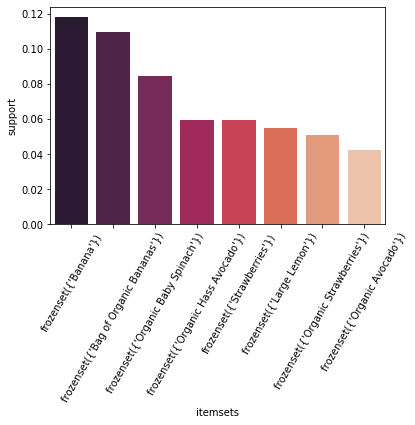

In [155]:
# Relative item frequency at a glance 

sample=frequent_items.loc[frequent_items['support']>=0.04].sort_values(by='support', ascending=False)
sns.barplot(sample['itemsets'], sample['support'], palette='rocket')
plt.xticks(rotation=60)
plt.show()

### Association Rules

Association analysis is an unsupervised learning algorithm.

Some of the other metrics used are:
1. Confidence: This measures the relaibility of a rule. It is the percentage chance of B being purchased given that A has already been purchased. Ranges from 0-1 and is directional.
        Confidence(A -> B) = Support(A -> B)/Support(A)

2. Lift: This measures the observed support(A -> B) as compared to the event that the two rules are independent. Lift has no direction, that is, lift(A -> B)=lift(B -> A). Ranges from 0,inf. Value of 1 indicates independence.
       
       Lift(A -> B)= Confidence(A -> B)/Support(B) = Support(A -> B)/Support(A) * Support(B)
       
       Lift(A -> B)=1, the rules occur together randomly; no relationship
       Lift(A -> B)>1, the rules occur together more often than random; positive relationship
       Lift(A -> B)=1, the rules occur together less often than random; negative relationship

3. Leverage: Measures the difference between observed frequency and the frequency of occurrence if the two rules were independent. Ranges from -1,1. Value of 0 indicates independence.
       Leverage(A -> B)=Support(A -> B) - (Support(A) * Support(B))

4. Conviction: It is a measure of the dependence of consequent on antecedent. 
       Conviction(A -> B)= (1-support(B))/(1-Confidence(A -> B))
       
       If A, B are independent then Confidence(A -> B)=Support(B) and Conviction(A -> B)=1
       If A, B are highly dependent then Confidence(A -> B)~1 and Conviction(A -> B)~inf

In [156]:
# Determine rules based on confidence>=50%
rules_1=association_rules(frequent_items, metric='confidence', min_threshold=0.5)
rules_1
#rules_1.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Cucumber),(Bag of Organic Bananas),0.025316,0.109705,0.012658,0.500000,4.557692,0.009881,1.780591
1,(Organic Raspberries),(Bag of Organic Bananas),0.037975,0.109705,0.021097,0.555556,5.064103,0.016931,2.003165
2,(Organic Tomato Cluster),(Bag of Organic Bananas),0.016878,0.109705,0.012658,0.750000,6.836538,0.010807,3.561181
3,(Seedless Red Grapes),(Bag of Organic Bananas),0.016878,0.109705,0.012658,0.750000,6.836538,0.010807,3.561181
4,(Mango Chunks),(Banana),0.021097,0.118143,0.012658,0.600000,5.078571,0.010166,2.204641
5,(Organic Fuji Apple),(Banana),0.025316,0.118143,0.012658,0.500000,4.232143,0.009667,1.763713
6,(Blueberries),(Organic Baby Spinach),0.025316,0.084388,0.012658,0.500000,5.925000,0.010522,1.831224
7,(Mango Chunks),(Organic Baby Spinach),0.021097,0.084388,0.012658,0.600000,7.110000,0.010878,2.289030
8,(Organic Cilantro),(Organic Lemon),0.021097,0.037975,0.012658,0.600000,15.800000,0.011857,2.405063
9,(Organic Cucumber),(Organic Raspberries),0.025316,0.037975,0.012658,0.500000,13.166667,0.011697,1.924051


It is more than random coincidence that 'organic' fruits and vegetables like tomatoes, cucumber, bananas, kiwi, strawberry, baby spinach are brought together. It appears that these organic ingredients which are mostly used in healthy recipes like salads or smoothies tend to be bought together or should be recommended when one of the antecedent item sets are purchased by a customer.

In [157]:
# Determine rules based on lift>=1.2 and confidence>=60%
rules_2=association_rules(frequent_items, metric='lift', min_threshold=1.2)
rules_2[rules_2['confidence']>=0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Organic Tomato Cluster),(Bag of Organic Bananas),0.016878,0.109705,0.012658,0.75,6.836538,0.010807,3.561181
12,(Seedless Red Grapes),(Bag of Organic Bananas),0.016878,0.109705,0.012658,0.75,6.836538,0.010807,3.561181
18,(Mango Chunks),(Banana),0.021097,0.118143,0.012658,0.60,5.078571,0.010166,2.204641
32,(Mango Chunks),(Organic Baby Spinach),0.021097,0.084388,0.012658,0.60,7.110000,0.010878,2.289030
38,(Organic Cilantro),(Organic Lemon),0.021097,0.037975,0.012658,0.60,15.800000,0.011857,2.405063
46,(Organic Kiwi),(Organic Strawberries),0.016878,0.050633,0.012658,0.75,14.812500,0.011804,3.797468
48,"(Organic Raspberries, Organic Cucumber)",(Bag of Organic Bananas),0.012658,0.109705,0.012658,1.00,9.115385,0.011270,inf
49,"(Organic Raspberries, Bag of Organic Bananas)",(Organic Cucumber),0.021097,0.025316,0.012658,0.60,23.700000,0.012124,2.436709
50,"(Bag of Organic Bananas, Organic Cucumber)",(Organic Raspberries),0.012658,0.037975,0.012658,1.00,26.333333,0.012178,inf


In [158]:
# Determine rules where there are 2 or more items in antecedent, lift>=1 and confidence>=75%

rules_3=association_rules(frequent_items, metric='lift', min_threshold=1)
rules_3['antecedents_len']=rules_3['antecedents'].apply(lambda x:len(x))
rules_3[(rules_3['antecedents_len']>=2) & (rules_3['confidence']>=0.75)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
48,"(Organic Raspberries, Organic Cucumber)",(Bag of Organic Bananas),0.012658,0.109705,0.012658,1.0,9.115385,0.011270,inf,2
50,"(Bag of Organic Bananas, Organic Cucumber)",(Organic Raspberries),0.012658,0.037975,0.012658,1.0,26.333333,0.012178,inf,2


It is highly likely that if a customer buys organic cucumber and organic bananas then they will also buy organic raspberries.
It is also highly likely that if a customer buys organic cucumber and organic raspberries then they will also buy organic bananas.


### Visualizing the results

Let's proceed with the results of first set of rules

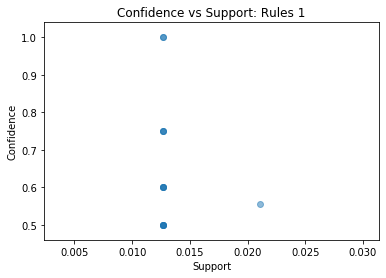

In [159]:
# Support vs confidence at a glance

plt.scatter(rules_1['support'], rules_1['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs Support: Rules 1')
plt.show()

It is interesting to note that the data does not have much variation in the support for different item sets.

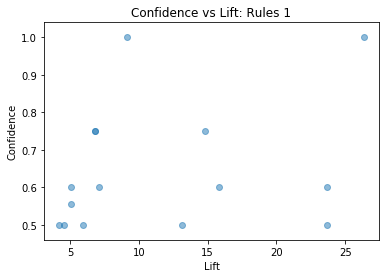

In [160]:
# Confidence vs lift at a glance

plt.scatter(rules_1['lift'], rules_1['confidence'], alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Confidence vs Lift: Rules 1')
plt.show()

Confidence and lift appear to have a linear positive relationship however, there are a few outliers.

### Conclusion

With necessary domain knowledge, one can be armed with these measures and analysis to identify patterns in previous Instacart orders to improve business. The analysis can be used to predict future buys, recommend additional items to new customers, or maintain inventory accordingly.